In [ ]:
from code_py.preprocessing import imageToMap
from code_py.filter import load_images_from_folder
import os

in_path = "../final_dataset/annotated/101-200/"
out_path = "../final_dataset/annotated/maps/"
os.makedirs(out_path, exist_ok=True)
imgs = load_images_from_folder(in_path)
for img in imgs:
    imageToMap(in_path, out_path, img)

In [ ]:
from shutil import copyfile
from code_py.filter import load_images_from_folder

import os

in_path =  '../301-500/'
out_path =  '../300-500/'
os.makedirs(out_path, exist_ok=True)
imgs = load_images_from_folder(in_path)

counter = 300
for img in imgs:
    copyfile(os.path.join(in_path, img), os.path.join(out_path, str(counter)+".png"))
    counter = counter + 1

In [ ]:
import os
from PIL import Image
from PIL.ImageOps import pad, grayscale, autocontrast, invert
from code_py.filter import load_images_from_folder

path = "./images/sorted/"
#os.makedirs(path + '/grayT', exist_ok=True)
imgs = load_images_from_folder(path)
for img in imgs:
    image = Image.open(os.path.join(path, img))
    bg = Image.new('RGBA', (800,800), color = (0,0,0,0))
    bg.paste(image, image)
    bg.save(path+img)



In [ ]:
path = "./images/complete_floorplan/output/squared/grayT"
os.makedirs(path + '/uniform/', exist_ok=True)
imgs = load_images_from_folder(path)
for img in imgs:
    image = Image.open(os.path.join(path, img)).convert('RGBA')
    pixdata = image.load()

    width, height = image.size
    for y in range(height):
        for x in range(width):
            if pixdata[x, y] != (255, 255, 255, 255) and pixdata[x, y] != (0, 0, 0, 255) and pixdata[x, y] != (0, 0, 0, 0):
                pixdata[x, y] = (90, 90, 90, 255)
    image.save(path+"/uniform/"+img)

In [ ]:
path = "./images/complete_floorplan/output/squared/grayT/uniform"
os.makedirs(path + '/quadmap/', exist_ok=True)
imgs = load_images_from_folder(path)
for img in imgs:
    image = Image.open(os.path.join(path, img)).convert('LA')
    pixdata = image.load()

    width, height = image.size
    for y in range(height):
        for x in range(width):
            if pixdata[x, y][1] == 0:
                pixdata[x, y] = (0,255)
            elif pixdata[x,y][0] == 0:
                pixdata[x, y] = (1,255)
            elif pixdata[x, y][0] == 255:
                pixdata[x, y] = (3,255)
            else:
                pixdata[x, y] = (2,255)

    image.save(path+"/quadmap/"+img)

In [ ]:

import os
from PIL import Image
from code_py import filter
path =  '../301-500/'
imgs = filter.load_images_from_folder(path)
for img in imgs:
        image = Image.open(os.path.join(path, img))
        width, height = image.size
        if True:
            bg = Image.new('RGBA', (800,800), color = (0,0,0,0))
            bg.paste(image)
            bg.save(path+img)

In [ ]:
import os
from PIL import Image
from code_py import filter
from code_py import preprocessing
path =  '../final_dataset/0-300/'
mask_path = '../final_dataset/annotated/maps/'
os.makedirs(path+'aug/', exist_ok=True)
os.makedirs(mask_path+'aug/', exist_ok=True)
imgs = filter.load_images_from_folder(path)
masks = filter.load_images_from_folder(mask_path)
preprocessing.pregenDataAugm(imgs, masks, path, mask_path)

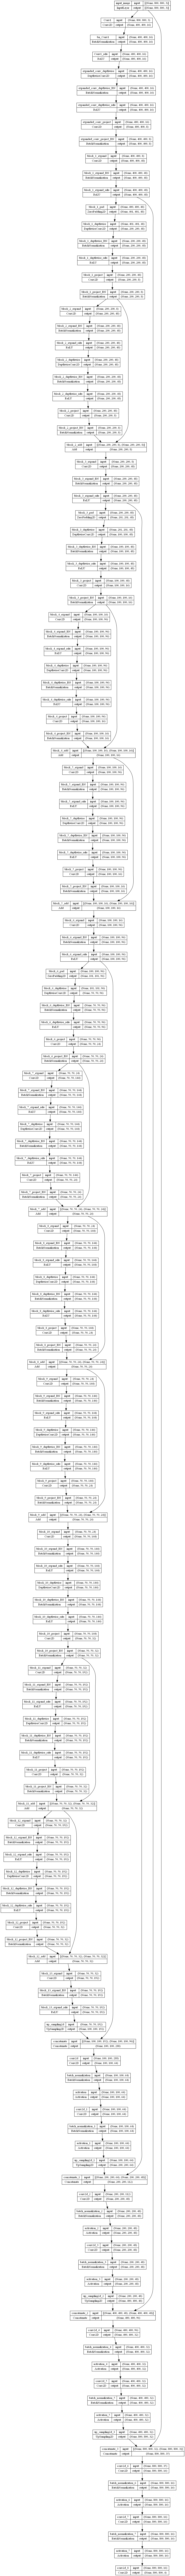

In [1]:
from code_py import MobileNet
from keras.utils.vis_utils import plot_model

mobile = MobileNet.make_Mobile((800,800),4)
plot_model(mobile, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
